In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [53]:
from numpy.random import rand, randn

In [54]:
n, d, k = 100, 2, 2

In [55]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [56]:
def compute_log_p(X, mean, sigma):
    dividor = np.power(2 * np.pi, X.shape[1] / 2) * np.power(np.linalg.det(sigma), 0.5)
    extractor = np.arange(X.shape[0])
    e = (X-mean).dot(np.linalg.inv(sigma)).dot((X-mean).T)
    e = np.exp(e)
    # only diag is interesting
    e = e[extractor, extractor]
    return e / dividor

def compute_log_p(X, mean, sigma):
    d = X.shape[1]
    np.linalg.det(theta1[1]),
    p2 = np.diag(1/(np.pi**(d/2) * np.sqrt(np.abs(det2)))* np.exp(-0.5 * (X - theta2[0]).reshape((-1, d))@inv1@(X - theta2[0]).reshape((d, -1))))
    e = (X-mean).dot(np.linalg.inv(sigma)).dot((X-mean).T)
    e = np.exp(e)
    # only diag is interesting
    e = e[extractor, extractor]
    return e / dividor


# compute_log_p(X, means[0], sigmas[0])

In [57]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [58]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


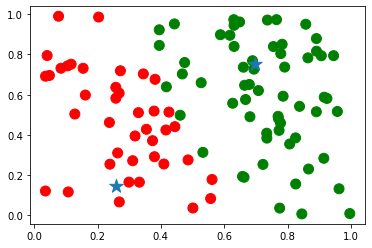

In [59]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()